# Classification with Linear and MLP models

We will examine a simple problem of classification between two classes, similar to that illustrated in class. 
We will generate data from two-dimensional normal distribution. For the first class we will use a 2 dimensional distribution with different variances and a rotation that introduces covariances. The second class will be a mixture of four normal distributions with different centers.

In [81]:
import numpy as np
import matplotlib.pyplot as plot

# Define the rotation and expansion matrices

rotation = np.array([[0.94, -0.34], [0.34, 0.94]])

scale = np.array([[3.4, 0], [0, 2]])

# Generate data for class 1
#random numbers work by starting with a number (the seed), 
#multiplying it by a large number, then taking modulo of that product. 
#The resulting number is then used as the seed to generate the next "random" number. 
#When you set the seed (every time), it does the same thing every time, giving you the same numbers.
np.random.seed(150)
class1 = (np.random.randn(100,2)).dot(scale).dot(rotation)

# Generate data for class 2

class21 = np.random.randn(25,2)+[-10, 2]
class22 = np.random.randn(25,2)+[-7, -2]
class23 = np.random.randn(25,2)+[-2, -6]
class24 = np.random.randn(25,2)+[5, -7]


data = np.concatenate((class1, class21, class22, class23, class24))

# build the labels

label_class1 = np.ones(100, dtype=np.int64)

label_class2 = np.zeros(100, dtype=np.int64)

labels = np.concatenate((label_class1, label_class2))


## Visualization of our simulated data

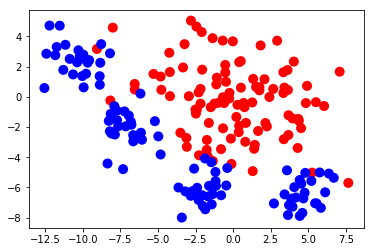

In [82]:
cmp = np.array(['b','r'])

plot.scatter(data[:,0],data[:,1],c=cmp[labels],s=100,edgecolors='none')


## Let us now generate a first division between learning data and test data:

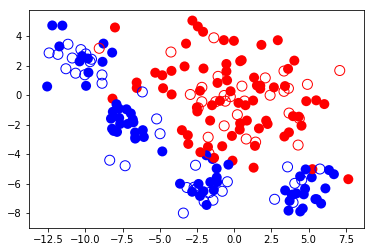

In [83]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.33)

plot.figure()

plot.scatter(data_train[:,0], data_train[:,1], c=cmp[label_train], s=100, edgecolors='none')

plot.scatter(data_test[:,0], data_test[:,1], c='none', s=100, edgecolors=cmp[label_test])


Let us first find a linear model for this problem of classification between two classes. Let us use the linear discriminant analysis (LDA). See: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html">LDA</a>

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# train and print the score
lda.fit(data_train, label_train)

train_score = lda.score(data_train, label_train)

test_score = lda.score(data_test, label_test)


print ("the training score is %f and the test score is %f"%(train_score, test_score))

the training score is 0.835821 and the test score is 0.939394


## We can visually examine the model found (the linear discrimination boundary)

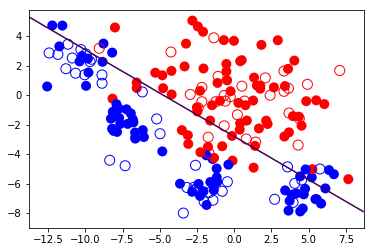

In [85]:
plot.figure()
plot.scatter(data_train[:,0], data_train[:,1], c=cmp[label_train], s=100, edgecolors='none')
plot.scatter(data_test[:,0], data_test[:,1], c='none',s=100, edgecolors=cmp[label_test])

x_min, x_max = plot.xlim()
y_min, y_max = plot.ylim()

mm, nn = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 100))
p = lda.predict_proba(np.c_[mm.ravel(), nn.ravel()])
p = p[:, 1].reshape(mm.shape)
plot.contour(mm, nn, p, [0.5])

## Question:
#### Generate others training / test splits (with the same value test_size = 0.33)  and examine the differences in the results.
 

In [86]:
# Your answer here

#####  Let us use a MLP for this classification. For this we will be using <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier">MLP</a>.  Also see <a href="http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">Examples</a>. It is very important  to look at <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier ">the default values of the parameters</a>, which we will be  using except of $solver$ and $alpha$.

We first use a weight decay coefficient of $alpha = 1e^{-5}.$




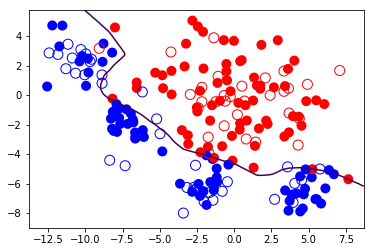

In [87]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5)

# training and testing
mlpc.fit(data_train, label_train)
train_score = mlpc.score(data_train, label_train)
test_score = mlpc.score(data_test, label_test)

plot.figure()
plot.scatter(data_train[:,0], data_train[:,1], c=cmp[label_train], s=100, edgecolors='none')
plot.scatter(data_test[:,0], data_test[:,1], c='none',s=100, edgecolors=cmp[label_test])

x_min, x_max = plot.xlim()
y_min, y_max = plot.ylim()

mm, nn = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
p = mlpc.predict_proba(np.c_[mm.ravel(), nn.ravel()])
p = p[:, 1].reshape(mm.shape)
plot.contour(mm, nn, p, [0.5])